# Monte-Carlo Integration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Assume we want to compute an intractable integral such that: $I=\int_{0}^{1} \int_{0}^{1}e^{{(x+y)}^4}dxdy$. Although this integral cannot be computed analytically, it can be approximated accurately using MC-Integration.

To apply the MC-Integration technique, we can work as follows:
Let $X=U_1\sim Uniform(0,1)\;\text{and}\;Y=U_2\sim Uniform(0,1)$ be two independent uniform random variables. Their joint pdf will be: $f_{XY}(x,y)=f_{X}(x)f_{Y}(y)=1$ from the independence assumption.

Further, let $e^{{(x+y)}^4}=e^{{(U_1+U_2)}^4}=g(U_1,U_2)$

and so:

$I=\int_{0}^{1} \int_{0}^{1}e^{{(x+y)}^4}dxdy=\int_{0}^{1} \int_{0}^{1}e^{{(x+y)}^4}f_{XY}(x,y)dxdy=\mathbb{E}[g(U_1,U_2)]$.

From the Law of Large numbers, we have that: $\overline {g(U_{1},U_{2})}=\frac{1}{N}\sum_{i=1}^N g(U_{1i},U_{2i})  \overset{p}{\to} \mathbb{E}[g(U_1,U_2)]=I$, where $N$ is the number of Uniform random variables generated (Sample Size).

Thus, we can approximate probabilistically the integral as: $I=\int_{0}^{1} \int_{0}^{1}e^{{(x+y)}^4}dxdy\approx \frac{1}{N}\sum_{i=1}^N g(U_{1i},U_{2i}),\;\text{with}\;U_{1i},U_{2i}\sim Uniform(0,1)\;\text{for}\;i=1:N$.

## Convergence

To examine the convergence of the estimator, with respect to the sample size, let $X_i=g(U_{1i},U_{2i})$. Then, $\overline X=\frac{1}{N}\sum_{i=1}^N X_i$ and from the indepence assumption ($iid$) we get: $Var(\overline X)=\frac{Var(X_i)}{N}$. 

From Chebysev's inequality we have: $P\left[|\bar X-\mathbb{E}[\bar X]|\geq k \right]\leq \frac{Var(\bar X)}{k^2}=\frac{Var(X_i)}{k^2N}$.

In this case, $Var(X_i)=Var\left[ e^{{(U_{1i}+U_{2i})}^4}\right]$ is very difficult to be computed. But, we can take a step further and use Popovicius' Inequality, which states that:

If $X_i \in [\alpha,\beta]\;\text{then}\;Var(X_i)\leq \frac{(b-a)^2}{4}$. Here, we have that $X_i \in \left[1,e^{32}\right]$.

Thus, the upper probability bound as a function of the sample size and the approximation error is:

$P\left[|\bar X-\mathbb{E}[\bar X]|\geq k \right]\leq \frac{e^{32}-1}{4k^2N}$.

By defining a desired approximation error $k$ and adjusting the probability of the approximation to be greater than this error, we can solve for the required sample size $N$ using the above relationship.

# MC-Approximation

In [69]:
# Use different sample size in increasing order in powers of 10:
N=np.logspace(0,8,num=20,base=10)
#Store the computed integral value for each sample size used:
I=np.zeros(len(N))
for i,sample_size in enumerate(N):
    #Sample 2 independent Uniform(0,1) random variables of size N and evaluate the function element-wise
    #Use vectorization to avoid loops:
    U1=np.random.uniform(0,1,int(sample_size))
    U2=np.random.uniform(0,1,int(sample_size))
    #Evaluate the function at each random point:
    f=np.exp((U1+U2)**4)
    #Approximate the integral with MC-Integration:
    I[i]=f.mean()

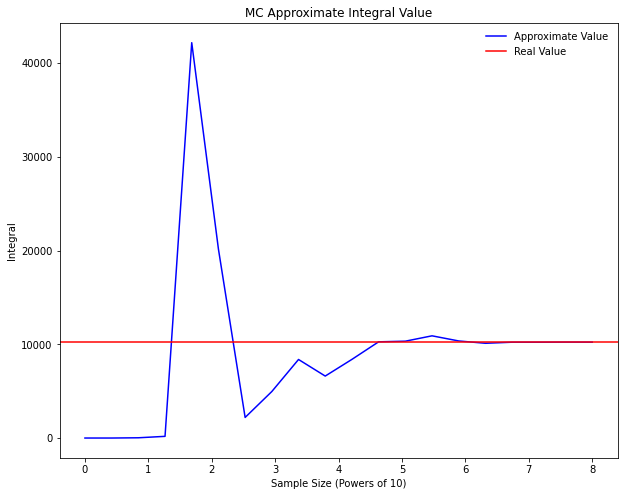

In [84]:
plt.figure(figsize=(10,8))
plt.plot(np.log10(N),I,color="blue",label="Approximate Value")
plt.ylabel("Integral")
plt.xlabel("Sample Size (Powers of 10)")
plt.title("MC Approximate Integral Value")
plt.axhline(y=10200,color="red",label="Real Value")
plt.legend(frameon=False)
plt.show()